Constructing aircraft wing area model using fuselage length and width.

---

The predictor variables are:
- fuselage length
- fuselage width

The target is:
- wing area

## Loading common libraries

<br/>

Note: use `%matplotlib widget` for interactive 3D plot.

Following the installation guide for `ipywidgets` at:

https://github.com/jupyter-widgets/ipywidgets

In [1]:
# %matplotlib widget
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D

## Loading data

Splitting data in training and testing data sets.

In [3]:
df = pd.read_csv("data/aircraft.csv", index_col=0)
df = df.sort_values("max_weight")

train_acs = "A320,A343,A359,A388,B737,B744,B748,B752,B763,B773,B789,C550,E145,E190"
train_acs = train_acs.split(",")

df_train = df.query("index in @train_acs")
df_test = df.query("index not in @train_acs")

X_train = df_train[["length", "width"]].values
y_train = df_train["wing_area"].values

X_test = df_test[["length", "width"]].values
y_test = df_test["wing_area"].values

## Function to plot 3D data

In [4]:
def plotdata(ax):
    ax.scatter(
        X_train[:, 0], X_train[:, 1], y_train, color="k", s=15, label="training data"
    )

    ax.scatter(
        X_test[:, 0], X_test[:, 1], y_test, color="r", s=25, label="testing data"
    )

    ax.set_xlabel("Fueslage length (m)")
    ax.set_ylabel("Fueslage width (m)")
    ax.set_zlabel("Wing area ($m^2$)")
    ax.legend()

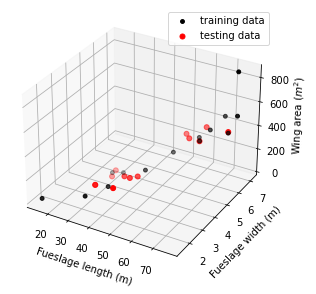

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plotdata(ax)
plt.tight_layout()

# Multiple linear regression solution

Let us represent data as follows:

$$(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots ,(\mathbf{x}_n, y_n) $$

Here $\mathbf{x}$ represents the input vector with dimension $m$:

$$
\mathbf{x} = [x_1, x_2, \cdots, x_m]
$$

In this example $m=2$

We want to obtain a linear model that describes the relationship between $\mathbf{x}_i$ and $y_i$:

$$
y_i = \mathbf{x}_i \beta + \epsilon_i
$$

In vector form:
$$
y_i = 
[1, x_1, x_2, \cdots, x_m]_i
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_m
\end{bmatrix} + \epsilon_i
$$


where $\beta_m$ is the coefficient for the m-th dimension.

Considering all the training data points, we have the equation in following matrix form:

$$
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \dots & x_{1m}\\
1 & x_{21} &  \dots & x_{2m}\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & \dots & x_{nm}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_0 \\ \epsilon_1 \\ \vdots \\ \epsilon_n
\end{bmatrix}
$$

Let us write it as:

$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \epsilon
$$

Then, our goal is to minimize the residual sum of squares, $\epsilon^T \epsilon$.

The matrix format of RSS is:

$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) 
$$

In order to obtain the optimal $\beta$, we need to calculate the gradient of RSS:

$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) 
$$

$$
\nabla RSS(\beta) = \frac{\partial RSS}{\partial \beta} = -2 \mathbf{X}^T(\mathbf{y} - \mathbf{X} \beta)
$$

The optimal solution for $\hat\beta$ is when the second term of the gradient is zero.

$$
\mathbf{y} - \mathbf{X} \hat\beta = 0
$$

We first separate the $\mathbf{X}$ and $\mathbf{y}$. 

$$
\mathbf{X} \hat\beta = \mathbf{y}
$$

Then we multiple by $\mathbf{X}^T$ so we can invert the matrix.

$$
\mathbf{X}^T \mathbf{X} \hat\beta = \mathbf{X}^T \mathbf{y}
$$

Finally, we have the closed-form solution for $\beta$:

$$
\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This is the **Least-Squares Solution** in matrix form.

Recall the least-squares solution in simple linear regression:

$$
\begin{align}
\hat\beta_0 &= \frac{\sum y_i}{N} - \hat\beta_1 \frac{\sum x_i}{N} \\
\hat\beta_1 &= \frac{\sum x_i y_i - \frac{1}{N} \sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{N} \left(\sum x_i\right)^2}
\end{align}
$$

<br>

It is the same as the following equation with two parameters.

$$
\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


# Python implementation
Next, let us implement the code in Python using `numpy` matrix calculation.

Recall the closed-form least squares solution in matrix form:

$$
\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [6]:
X = np.insert(X_train, 0, 1, axis=1)
Y = y_train.reshape(-1, 1)

res = np.dot(X.T, X)
res = np.dot(np.linalg.inv(res), X.T)
res = np.dot(res, Y)

coef = res.squeeze().round(2)

print("Coefficients:", *coef)

Coefficients: -279.96 -3.62 163.86


## Visualize the regression results

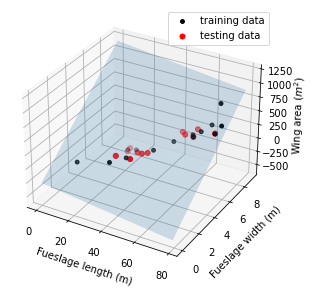

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plotdata(ax)

# generate and plot the plane
x1, x2 = np.meshgrid(range(0, 80), range(0, 10))
z = coef[0] + coef[1] * x1 + coef[2] * x2

ax.plot_surface(x1, x2, z, alpha=0.2)

plt.tight_layout()

## Implement multiple regression using Scikit-Learn

Using `LinearRegression` class from the linear model package.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
b0 = model.intercept_.round(2)
b1, b2 = model.coef_.round(2)

print("Coefficients: {}, {}, {}".format(b0, b1, b2))

Coefficients: -279.96, -3.62, 163.86


### Evaluation

Recall our model in the example:

$$
\begin{bmatrix}
\hat y_0 \\ \hat y_1 \\ \vdots \\ \hat y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & x_{12}\\
1 & x_{21} & x_{22}\\
\vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2}
\end{bmatrix}
\begin{bmatrix}
\hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_3
\end{bmatrix}
$$

In [9]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    r2_score,
)

In [10]:
y_predict = coef[0] + coef[1] * X_test[:, 0] + coef[2] * X_test[:, 1]

In [11]:
mae = mean_absolute_error(y_predict, y_test)
print("MAE:\t", mae.round(2))

MAE:	 64.17


In [12]:
medae = median_absolute_error(y_predict, y_test)
print("MedAE:\t", medae.round(2))

MedAE:	 63.76


In [13]:
rmse = np.sqrt(mean_squared_error(y_predict, y_test))
print("RMSE:\t", rmse.round(2))

RMSE:	 71.19


In [14]:
r2 = r2_score(y_predict, y_test)
print("R2:\t", r2.round(3))

R2:	 0.775
